# Import The Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the Data

In [2]:
databayam = pd.read_csv('/Users/mdwivaaryaerlangga/Downloads/NHANES_age_prediction.csv')
X = databayam.iloc[:,1:-1].values
y = databayam.iloc[:, -1].values

In [3]:
y = y.reshape(len(y),1)

In [4]:
print(X)

[['Adult' 61.0 2.0 ... 110.0 2.0 150.0]
 ['Adult' 26.0 2.0 ... 89.0 2.0 80.0]
 ['Adult' 16.0 1.0 ... 89.0 2.0 68.0]
 ...
 ['Adult' 34.0 1.0 ... 103.0 2.0 124.0]
 ['Adult' 60.0 2.0 ... 90.0 2.0 108.0]
 ['Adult' 26.0 1.0 ... 108.0 2.0 108.0]]


# Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
y = sc_y.fit_transform(y)
X = sc_x.fit_transform(X)

In [13]:
print(X,y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Training The SVR model on the wholw dataset

In [15]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/Users/mdwivaaryaerlangga/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Predicting new result

In [18]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

# Visualizing the SVR result

Text(0, 0.5, 'Salary')

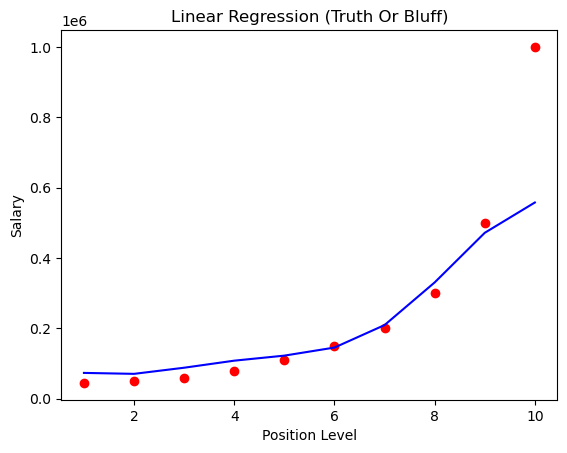

In [20]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Linear Regression (Truth Or Bluff)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

# Visualizing the SVR result (Higher Resolution)

Text(0, 0.5, 'Salary')

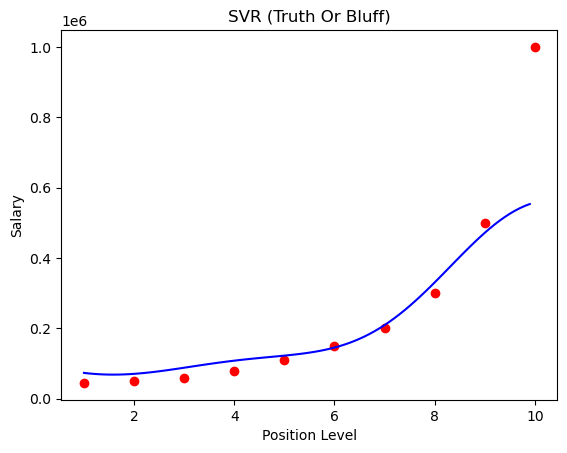

In [24]:
X_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('SVR (Truth Or Bluff)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
